**My Portfolio**



1.   Reliance Industries Limited
2.   SUN TV Network Limited
3.   Bajaj Finance
4.   ITC
5.   WIPRO
6.   CIPLA
7.   Ashok Leyland Limited
8.   Godrej Properties Limited



In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt

In [ ]:
stocks = ['RELIANCE.NS','SUNTV.NS','BAJFINANCE.NS','ITC.NS','WIPRO.NS','CIPLA.NS','ASHOKLEY.NS','GODREJPROP.NS']
data = web.DataReader(stocks,data_source="yahoo",start='01/01/2015',end='31/12/2019')['Adj Close']

In [ ]:
returns = data.pct_change()[1:]

In [ ]:
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()

In [ ]:
data.shape

(1229, 8)

In [ ]:
num_portfolios = 50000

In [ ]:
results = np.zeros((3+len(stocks),num_portfolios))

In [ ]:
for i in range(num_portfolios):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    portfolio_return = np.sum(mean_daily_returns * weights) * data.shape[0]
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(data.shape[0])
    
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = results[0,i] / results[1,i]
    for j in range(len(weights)):
        results[j+3,i] = weights[j]

In [ ]:
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',stocks[0],stocks[1],stocks[2],stocks[3],stocks[4],stocks[5],stocks[6],stocks[7]])

In [ ]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

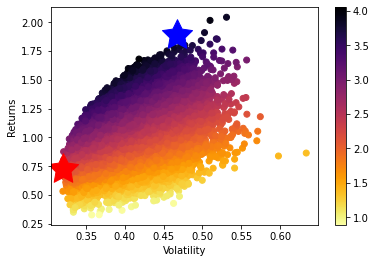

In [ ]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='inferno_r')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='b',s=1000)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='r',s=1000)


Portfolio for max sharpe ratio:

In [ ]:
print(max_sharpe_port)

ret              1.890561
stdev            0.467019
sharpe           4.048145
RELIANCE.NS      0.261719
SUNTV.NS         0.012581
BAJFINANCE.NS    0.450284
ITC.NS           0.065933
WIPRO.NS         0.013769
CIPLA.NS         0.073255
ASHOKLEY.NS      0.003495
GODREJPROP.NS    0.118965
Name: 45753, dtype: float64


Portfolio for min volatility:

In [ ]:
print(min_vol_port)

ret              0.724067
stdev            0.319982
sharpe           2.262838
RELIANCE.NS      0.154255
SUNTV.NS         0.046296
BAJFINANCE.NS    0.073623
ITC.NS           0.162544
WIPRO.NS         0.296381
CIPLA.NS         0.182884
ASHOKLEY.NS      0.026464
GODREJPROP.NS    0.057554
Name: 8039, dtype: float64


**How did you choose the stocks?**

Stocks were chosen from a wide variety of industries so as to diversify the stocks so that my portfolio does not rely heavily on a certain industry as it will be prone to major risks. Each of the companies in their particular industries were chosen on the basis that they are one of the leading companies in these sectors as well as on the basis of past performances of their stocks.

**What is the impact of increasing the number of stocks in the portfolio?**

On increasing the nomber of stocks in the portfolio there was a decrease in the volatility and the return of the portfolio but there was not much change in the return:volatility ratio of the portfolio.

**Why are calculating the weights by optimization and not giving equal weightage to every stock?**

Weights are calculated by optimization because we expect a portfolio which would provide us with maximum benefits with minimum risks. Optimization ensures all cases are observed and provides us with the most beneficial set of weights.
Giving equal weights to each stock would be costly to us as we would be having a portfolio which does not provide us the maximum return for a given amount of risk.

**Which optimization techniques are used by Mutual Funds currently?**

Monte Carlo Optimization is generally used by mutual funds.